In [1]:
# configuration for root-dir
import os, sys ; ROOT = os.path.dirname(os.getcwd())
sys.path.insert(0, ROOT) if ROOT not in sys.path else None

In [2]:
# import libraries
from src.preprocessing import Preprocessing
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# read complete_books file
books = pd.read_csv(os.path.join(ROOT, 'data', 'complete_books.csv'), low_memory=False)
books.head(2)

,isbn,title,author,year_of_publication,publisher,description
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and f..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"It is the year 1934, and in a small town in Ca..."


In [4]:
# read new_books file
new_books = pd.read_csv(os.path.join(ROOT, 'data', 'new_books.csv'), low_memory=False)
new_books.head(2)

,isbn,title,description,author,year_of_publication,publisher
0,1338576011,Into the Pit (Five Nights at Freddy’s: Fazbear...,Five Nights at Freddy's fans won't want to mis...,"Cawthon, Scott; Cooper, Elley",2019,Scholastic Inc.
1,133857602X,Fetch (Five Nights at Freddy’s: Fazbear Fright...,The Fazbear Frights series continues with thre...,"Cawthon, Scott; West, Carly Anne; Waggener, An...",2020,Scholastic Inc.


In [5]:
# merge books into complete_books v2
books = pd.concat([books, new_books], ignore_index=True)
books

,isbn,title,author,year_of_publication,publisher,description
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and f..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"It is the year 1934, and in a small town in Ca..."
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,An outstanding military history that offers a ...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"The fascinating, true story of the world's dea..."
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,"Barber, one the world's leading authorities on..."
...,...,...,...,...,...,...
271365,1338741195,Friendly Face: An AFK Book (Five Nights at Fre...,"Cawthon, Scott; Waggener, Andrea",2021,Scholastic Inc.,Five Nights at Freddy's fans won't want to mis...
271366,1338741209,Prankster: An AFK Book (Five Nights at Freddy’...,"Cawthon, Scott; Waggener, Andrea; Cooper, Elley",2021,Scholastic Inc.,Five Nights at Freddy's fans won't want to mis...
271367,133813437X,The Silver Eyes: Five Nights at Freddy’s (Orig...,"Cawthon, Scott; Breed-Wrisley, Kira",2016,Scholastic Inc.,From the creator of the bestselling horror vid...
271368,1338139304,The Twisted Ones: Five Nights at Freddy’s (Ori...,"Cawthon, Scott; Breed-Wrisley, Kira",2017,Scholastic Inc.,The chilling sequel to the #1 New York Times b...


In [6]:
# get info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271370 entries, 0 to 271369
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271370 non-null  object
 1   title                271370 non-null  object
 2   author               271370 non-null  object
 3   year_of_publication  271370 non-null  object
 4   publisher            271370 non-null  object
 5   description          79436 non-null   object
dtypes: object(6)
memory usage: 12.4+ MB


In [7]:
# helper function: check column description
def check_description(books):
    undefined = len(books[(books['description'] == '<UNDEFINED>')])
    no_description = len(books[(books['description'] == '<NO_DESCRIPTION>')])
    not_null = len(books.loc[(books['description'].notna()), 'isbn'])
    none_of_them =  not_null - (undefined + no_description)

    print(f'<UNDEFINED>:      {undefined}')
    print(f'<NO_DESCRIPTION>: {no_description}')
    print(f'defined:          {none_of_them}')
    print(f'non-null:         {not_null}')
    print(f'total:            {len(books)}')

# check column description
check_description(books)

<UNDEFINED>:      1214
<NO_DESCRIPTION>: 3106
defined:          75116
non-null:         79436
total:            271370


In [8]:
# drop nan value
clear_books = books.copy()
clear_books.replace('', pd.NA, inplace=True)
clear_books.dropna(inplace=True)
clear_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79436 entries, 0 to 271369
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isbn                 79436 non-null  object
 1   title                79436 non-null  object
 2   author               79436 non-null  object
 3   year_of_publication  79436 non-null  object
 4   publisher            79436 non-null  object
 5   description          79436 non-null  object
dtypes: object(6)
memory usage: 4.2+ MB


In [9]:
check_description(clear_books)

<UNDEFINED>:      1214
<NO_DESCRIPTION>: 3106
defined:          75116
non-null:         79436
total:            79436


In [10]:
# assign an empty value to the tag value
clear_books['description'] = clear_books['description'].replace(['<UNDEFINED>', '<NO_DESCRIPTION>'], '')

# check column description
check_description(clear_books)

<UNDEFINED>:      0
<NO_DESCRIPTION>: 0
defined:          79436
non-null:         79436
total:            79436


In [11]:
# check nan value again
clear_books[(clear_books['description'] == '')].head()

,isbn,title,author,year_of_publication,publisher,description
32,3404921038,Wie Barney es sieht.,Mordecai Richler,2002,LÃ?Â¼bbe,
55,0245542957,Pacific Northwest,Hans Johannes Hoefer,1985,Chambers Harrap Publishers Ltd,
75,0451625889,The Prince,Niccolo Machiavelli,1952,Signet Book,
84,0743403843,Decipher,Stel Pavlou,2002,Simon & Schuster (Trade Division),
131,9724119378,O Deus Das Pequenas Coisas,Roy,1998,Edicoes Asa,


In [12]:
# check duplicate data in isbn
duplicated_isbn = clear_books[(clear_books['isbn'].duplicated() == True)]
print(f'count duplicated_isbn: {len(duplicated_isbn)}')
duplicated_isbn.head(2)

count duplicated_isbn: 0


,isbn,title,author,year_of_publication,publisher,description


In [13]:
# check duplicate data in title
duplicated_title = clear_books[(clear_books['title'].duplicated() == True)]
print(f'count duplicated_title: {len(duplicated_title)}')
duplicated_title.head(2)

count duplicated_title: 6822


,isbn,title,author,year_of_publication,publisher,description
239,0743486226,Angels & Demons,Dan Brown,2003,Atria,From the #1 New York Times bestselling author ...
355,0140374248,James and the Giant Peach,Roald Dahl,2000,Penguin USA (Paper),From the bestselling author of Charlie and the...


In [14]:
# take a look at duplicated titles (each title sometimes has different authors, publishers, or descriptions)
clear_books[(clear_books['title'] == 'James and the Giant Peach')]

,isbn,title,author,year_of_publication,publisher,description
272,0375814248,James and the Giant Peach,ROALD DAHL,2002,Knopf Books for Young Readers,Roald Dahl's children's classic will be redisc...
355,0140374248,James and the Giant Peach,Roald Dahl,2000,Penguin USA (Paper),From the bestselling author of Charlie and the...
9531,0141304677,James and the Giant Peach,Roald Dahl,2001,Puffin Books,
67020,0140328718,James and the Giant Peach,Roald Dahl,1988,Penguin Putnam~childrens Hc,James is desperately unhappy with his aunts un...
68748,0141311916,James and the Giant Peach,Roald Dahl,2001,Penguin Books,James Henry Trotter lives with two ghastly hag...


In [15]:
# check duplicate data in description
duplicated_description = clear_books[(clear_books['description'].duplicated() == True) & (clear_books['description'] != '')]
print(f'count duplicated_description: {len(duplicated_description)}')
duplicated_description.tail(2)

count duplicated_description: 3440


,isbn,title,author,year_of_publication,publisher,description
79368,0395957842,Women of the Four Winds,Elizabeth Fagg Olds,1999,Mariner Books,Annie Smith Peck attempted seven times to clim...
79389,0590021028,A Christmas Carol in Prose: Being a Ghost Stor...,Charles Dickens,1972,Scholastic Paperbacks,"Book by Dickens, Charles"


In [16]:
# take a look at duplicated descriptions
target = clear_books.loc[79368]['description']
print(target)
clear_books[(clear_books['description'] == target)]

Annie Smith Peck attempted seven times to climb Peru's highest mountain; Delia Akeley hunted big game in Africa; Marguerite Harrison spied in Russia for America; Louise Arner Boyd led expeditions to perilous East Greenland. Precursors of the modern Jane Goodalls and Sally Rides, these women represent a fascinating but forgotten era in the literature of exploration.


,isbn,title,author,year_of_publication,publisher,description
29084,0395395844,Women of the Four Winds,Elizabeth Fagg Olds,1985,Houghton Mifflin Co,Annie Smith Peck attempted seven times to clim...
79368,0395957842,Women of the Four Winds,Elizabeth Fagg Olds,1999,Mariner Books,Annie Smith Peck attempted seven times to clim...


In [17]:
# preprocessing title and descriptions
clear_books['title'] = clear_books['title'].apply(lambda _ : Preprocessing().fit_transform(_))
clear_books['description'] = clear_books['description'].apply(lambda _ : Preprocessing().fit_transform(_))
clear_books.head(2)

,isbn,title,author,year_of_publication,publisher,description
0,0195153448,"[classical, mythology]",Mark P. O. Morford,2002,Oxford University Press,"[featuring, the, authors, extensive, clear, an..."
1,0002005018,"[clara, callan]",Richard Bruce Wright,2001,HarperFlamingo Canada,"[it, is, the, year, 1934, and, in, a, small, t..."


In [18]:
# get the length each data
len_title = clear_books['title'].apply(len).tolist()
len_description = clear_books['description'].apply(len).tolist()
print(f'{len_title[:5] = }')
print(f'{len_description[:5] = }')

len_title[:5] = [2, 2, 3, 19, 4]
len_description[:5] = [205, 119, 23, 180, 106]


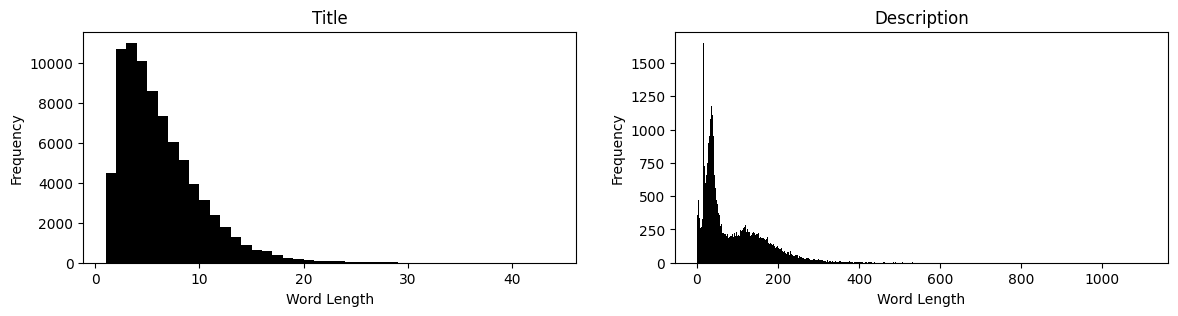

In [19]:
# distribution of word lengths
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.hist(len_title, color='black', bins=range(1, max(len_title)+1))
plt.title('Title')
plt.ylabel('Frequency')
plt.xlabel('Word Length')

plt.subplot(1, 2, 2)
plt.hist(len_description, color='black', bins=range(1, max(len_description)+1))
plt.title('Description')
plt.ylabel('Frequency')
plt.xlabel('Word Length')

plt.show()

In [20]:
# prepare for experiment
books.dropna(inplace=True)
books.info()
check_description(books)

<class 'pandas.core.frame.DataFrame'>
Index: 79436 entries, 0 to 271369
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isbn                 79436 non-null  object
 1   title                79436 non-null  object
 2   author               79436 non-null  object
 3   year_of_publication  79436 non-null  object
 4   publisher            79436 non-null  object
 5   description          79436 non-null  object
dtypes: object(6)
memory usage: 4.2+ MB
<UNDEFINED>:      1214
<NO_DESCRIPTION>: 3106
defined:          75116
non-null:         79436
total:            79436


In [21]:
# assign empty value to tag value
books['description'] = books['description'].replace(['<UNDEFINED>', '<NO_DESCRIPTION>'], '')

# check column description
check_description(books)

<UNDEFINED>:      0
<NO_DESCRIPTION>: 0
defined:          79436
non-null:         79436
total:            79436


In [22]:
# preprocessing title and description
books['title_processed'] = books['title'].apply(lambda _ : Preprocessing().fit_transform(_))
books['description_processed'] = books['description'].apply(lambda _ : Preprocessing().fit_transform(_))
books.head(2)

,isbn,title,author,year_of_publication,publisher,description,title_processed,description_processed
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and f...","[classical, mythology]","[featuring, the, authors, extensive, clear, an..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"It is the year 1934, and in a small town in Ca...","[clara, callan]","[it, is, the, year, 1934, and, in, a, small, t..."


In [23]:
# save to csv file
books.to_pickle(os.path.join(ROOT, 'data', 'prepared_books.pkl'))
books.head(2)

,isbn,title,author,year_of_publication,publisher,description,title_processed,description_processed
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and f...","[classical, mythology]","[featuring, the, authors, extensive, clear, an..."
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"It is the year 1934, and in a small town in Ca...","[clara, callan]","[it, is, the, year, 1934, and, in, a, small, t..."
